## Data Wrangling Project

Data wrangling process of tweets from @dog_rates.


### Gathering 

> The data used will be gathered from three sources.
- Manually downloaded twitter archive **csv** file for the dog rating tweets
- Programmatically downloaded **tsv** file containing the tweet image prediction
- Through the **Twitter API** to retrieve retweet and likes count using the tweet id

#### Manually downloaded
>Load the file `twitter_archive_enhanced.csv` into a dataframe

In [1]:
# import pandas 
import pandas as pd
archive = pd.read_csv('twitter_archive_enhanced.csv') #read the manually downloaded csv file into dataframe

#### Programmatic Download

In [2]:
# import the requests and os library 
import requests
import os

In [3]:
# use requests library to programmatically download the image prediction tsv file  
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

response = requests.get(url) #programmatically download the predictions tsv

In [4]:
# save the content of the reponse to a tsv file
with open('image_predictions.tsv', mode='wb') as file:
    file.write(response.content)

In [5]:
# read the tsv file to a dataframe
predictions = pd.read_csv('image_predictions.tsv', sep='\t')

#### Querying the Twitter API for retweet and like count

In [6]:
# import the access library for Twitter API
import tweepy 

In [7]:
# initialise the necessary keys and tokens for tweepy
consumer_key = ''
consumer_key_secret =''

access_token = ''
access_token_secret = ''

In [8]:
# obtain authorisation to use tweepy
auth = tweepy.OAuthHandler(consumer_key, consumer_key_secret)

# get access using the access tokens
auth.set_access_token(access_token, access_token_secret)

In [ ]:
# call the API
api = tweepy.API(auth, wait_on_rate_limit=True)

### Query the API

In [10]:
# list the tweet_id from the "archive" dataframe
ids = list(archive.tweet_id)

In [11]:
import json #import the json library

In [12]:
# create a txt file and loop through the tweet ids
# store each tweet status content as JSON format line by line in the txt file.
count = 0
with open('tweet_json.txt', 'w') as file:
    for each_id in ids:
        count += 1
        try:
            status = api.get_status(each_id, tweet_mode='extended')
            json.dump(status._json, file)
            file.write('\n')
            print(str(count), ': fetch successful')
        
        except Exception as e:
            print('sorry, tweet not found: ', e)
            pass

sorry, tweet not found:  name 'api' is not defined
sorry, tweet not found:  name 'api' is not defined
sorry, tweet not found:  name 'api' is not defined
sorry, tweet not found:  name 'api' is not defined
sorry, tweet not found:  name 'api' is not defined
sorry, tweet not found:  name 'api' is not defined
sorry, tweet not found:  name 'api' is not defined
sorry, tweet not found:  name 'api' is not defined
sorry, tweet not found:  name 'api' is not defined
sorry, tweet not found:  name 'api' is not defined
sorry, tweet not found:  name 'api' is not defined
sorry, tweet not found:  name 'api' is not defined
sorry, tweet not found:  name 'api' is not defined
sorry, tweet not found:  name 'api' is not defined
sorry, tweet not found:  name 'api' is not defined
sorry, tweet not found:  name 'api' is not defined
sorry, tweet not found:  name 'api' is not defined
sorry, tweet not found:  name 'api' is not defined
sorry, tweet not found:  name 'api' is not defined
sorry, tweet not found:  name '

sorry, tweet not found:  name 'api' is not defined
sorry, tweet not found:  name 'api' is not defined
sorry, tweet not found:  name 'api' is not defined
sorry, tweet not found:  name 'api' is not defined
sorry, tweet not found:  name 'api' is not defined
sorry, tweet not found:  name 'api' is not defined
sorry, tweet not found:  name 'api' is not defined
sorry, tweet not found:  name 'api' is not defined
sorry, tweet not found:  name 'api' is not defined
sorry, tweet not found:  name 'api' is not defined
sorry, tweet not found:  name 'api' is not defined
sorry, tweet not found:  name 'api' is not defined
sorry, tweet not found:  name 'api' is not defined
sorry, tweet not found:  name 'api' is not defined
sorry, tweet not found:  name 'api' is not defined
sorry, tweet not found:  name 'api' is not defined
sorry, tweet not found:  name 'api' is not defined
sorry, tweet not found:  name 'api' is not defined
sorry, tweet not found:  name 'api' is not defined
sorry, tweet not found:  name '

sorry, tweet not found:  name 'api' is not defined
sorry, tweet not found:  name 'api' is not defined
sorry, tweet not found:  name 'api' is not defined
sorry, tweet not found:  name 'api' is not defined
sorry, tweet not found:  name 'api' is not defined
sorry, tweet not found:  name 'api' is not defined
sorry, tweet not found:  name 'api' is not defined
sorry, tweet not found:  name 'api' is not defined
sorry, tweet not found:  name 'api' is not defined
sorry, tweet not found:  name 'api' is not defined
sorry, tweet not found:  name 'api' is not defined
sorry, tweet not found:  name 'api' is not defined
sorry, tweet not found:  name 'api' is not defined
sorry, tweet not found:  name 'api' is not defined
sorry, tweet not found:  name 'api' is not defined
sorry, tweet not found:  name 'api' is not defined
sorry, tweet not found:  name 'api' is not defined
sorry, tweet not found:  name 'api' is not defined
sorry, tweet not found:  name 'api' is not defined
sorry, tweet not found:  name '

In [37]:
# read the json file line by line into a dataframe
frame_list = []
with open('tweet_json.txt') as open_file:
    for line in open_file.readlines():
        tweet_id = json.loads(line)['id']
        retweet_count = json.loads(line)['retweet_count']
        favorite_count = json.loads(line)['favorite_count']
        language = json.loads(line)['lang']
        frame_list.append([int(tweet_id), retweet_count, favorite_count, language])

columns = ['tweet_id', 'retweet_count', 'favorite_count', 'language']

# create a dataframe from the json file
counts_df = pd.DataFrame(data = frame_list, columns = columns)

In [39]:
# preview the new df 
counts_df.head()

,tweet_id,retweet_count,favorite_count,language
0,892420643555336193,7003,33811,en
1,892177421306343426,5301,29324,en
2,891815181378084864,3478,22038,en
3,891689557279858688,7224,36929,en
4,891327558926688256,7757,35308,en


### Assessing

#### Visual Assessment

In [40]:
archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [41]:
predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [42]:
counts_df

,tweet_id,retweet_count,favorite_count,language
0,892420643555336193,7003,33811,en
1,892177421306343426,5301,29324,en
2,891815181378084864,3478,22038,en
3,891689557279858688,7224,36929,en
4,891327558926688256,7757,35308,en
...,...,...,...,...
2322,666049248165822465,37,89,en
2323,666044226329800704,115,247,en
2324,666033412701032449,36,100,en
2325,666029285002620928,39,112,en


#### Programmatic Assessment

In [43]:
# get overview of the archive dataset 
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [44]:
# preview content data of the df
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [45]:
# assess random sample data from the df
archive.sample(4)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
668,790277117346975746,NaN,NaN,2016-10-23 19:42:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bruce. He never backs down from a chal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/790277117...,11,10,Bruce,None,None,None,None
2300,667062181243039745,NaN,NaN,2015-11-18 19:29:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Keet. He is a Floridian Amukamara. Abs...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667062181...,10,10,Keet,None,None,None,None
1023,746521445350707200,NaN,NaN,2016-06-25 01:52:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Shaggy. He knows exactl...,6.678667e+17,4.196984e+09,2015-11-21 00:46:50 +0000,https://twitter.com/dog_rates/status/667866724...,10,10,Shaggy,None,None,None,None
1701,680940246314430465,NaN,NaN,2015-12-27 02:36:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Alice. She's an idiot. 4/10 https://t....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680940246...,4,10,Alice,None,None,None,None


In [46]:
# check if there are duplicated rows on the archive df
archive.duplicated().any()

False

In [47]:
# check if there are duplicated rows on the predictions df
predictions.duplicated().any()

False

In [48]:
# check if there duplicated rows on the counts_df df
counts_df.duplicated().any()

False

In [49]:
# assess unique values to see if some tweets were replies to other tweets and not actual ratings
archive.in_reply_to_status_id.nunique()

77

In [50]:
# assess unique values to see if some tweets were replies to other users and not actual ratings.
archive.in_reply_to_user_id.nunique()

31

In [51]:
# assess unique values to see if some tweets were retweets and not actual ratings.
archive.retweeted_status_id.nunique()

181

In [52]:
# assess unique values to see if some tweets were retweets and not actual ratings.
archive.retweeted_status_user_id.nunique()

25

In [53]:
# assess unique values to see if some tweets were retweets and not actual ratings.
archive.retweeted_status_timestamp.nunique()

181

In [54]:
# assess the values of the denominators
archive.rating_denominator.unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2], dtype=int64)

In [55]:
predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [56]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [57]:
# preview random data points for accuracy and consistency
predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1584,797236660651966464,https://pbs.twimg.com/media/CxBafisWQAAtJ1X.jpg,2,collie,0.767005,True,Border_collie,0.100844,True,kelpie,0.048368,True
1089,719332531645071360,https://pbs.twimg.com/media/CfuVGl3WEAEKb16.jpg,1,Dandie_Dinmont,0.224415,True,miniature_poodle,0.204882,True,Norfolk_terrier,0.090633,True
999,708479650088034305,https://pbs.twimg.com/media/CdUGcLMWAAI42q0.jpg,1,Shih-Tzu,0.218479,True,Lhasa,0.201966,True,Norfolk_terrier,0.165225,True
394,673612854080196609,https://pbs.twimg.com/media/CVknUTlVEAARjU5.jpg,1,Newfoundland,0.223101,True,Leonberg,0.111106,True,shovel,0.085626,False
1237,746790600704425984,https://pbs.twimg.com/media/Cl0iFdeXEAQtPyT.jpg,3,Boston_bull,0.936183,True,guinea_pig,0.010084,False,Cardigan,0.010077,True


In [58]:
counts_df.head()

,tweet_id,retweet_count,favorite_count,language
0,892420643555336193,7003,33811,en
1,892177421306343426,5301,29324,en
2,891815181378084864,3478,22038,en
3,891689557279858688,7224,36929,en
4,891327558926688256,7757,35308,en


In [59]:
counts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2327 non-null   int64 
 1   retweet_count   2327 non-null   int64 
 2   favorite_count  2327 non-null   int64 
 3   language        2327 non-null   object
dtypes: int64(3), object(1)
memory usage: 72.8+ KB


In [60]:
counts_df.favorite_count.unique()

array([33811, 29324, 22038, ...,   100,   112,  2292], dtype=int64)

In [61]:
counts_df.sample(5)

,tweet_id,retweet_count,favorite_count,language
991,746790600704425984,1465,4530,en
876,758405701903519748,1764,4878,en
1412,696886256886657024,1631,4453,en
670,787397959788929025,2670,10336,en
766,774314403806253056,5089,20542,en


### Quality Issues
`archive` table
- some tweets in the dataframe were retweets and not original ratings
- some tweets are replies to other users or tweets and not original tweets
- `timestamp` has the incorrect datatype - object
- `rating_numerator` and `rating_denominator` are floats and not integer datatypes
- the rating denominator is greater than 10 in some cases
- missing dog name and dog stage data represented as 'none'
- dataframe contained tweets that weren't dog ratings - the tweet with 0 rating

`predictions` table
- some predictions are not dogs


### Tidiness
`count_df` table
- tweet language does not have the same type of observational unit

`archive` table
- there are columns with different types observational units - dog stages
- dog stages were used as *variables* rather than *values*
- dataframe has some extraneous columns 

## Cleaning Data 
>Create a copy for all the dataframes before cleaning

>This stage cleans the dataset before analysis

In [62]:
# create copy for each df
archive_clean = archive.copy()
predictions_clean = predictions.copy()
counts_clean = counts_df.copy()

#### Define
convert the dog stages from variables to values in the archive_clean df

#### Code

In [63]:
# create new dataframe
dog_stages = archive_clean[['tweet_id', 'name', 'doggo', 'floofer', 'pupper','puppo']]
dog_stages.head()

,tweet_id,name,doggo,floofer,pupper,puppo
0,892420643555336193,Phineas,None,None,None,None
1,892177421306343426,Tilly,None,None,None,None
2,891815181378084864,Archie,None,None,None,None
3,891689557279858688,Darla,None,None,None,None
4,891327558926688256,Franklin,None,None,None,None


#### Define
> change missing dog stages and names to NAN for better analysis

#### Code

In [64]:
import numpy as np
dog_stages = dog_stages.replace('None', np.nan)

#### Test


In [65]:
dog_stages.sample(4)

,tweet_id,name,doggo,floofer,pupper,puppo
1260,710269109699739648,NaN,NaN,NaN,NaN,NaN
1416,698635131305795584,NaN,NaN,NaN,NaN,NaN
2249,667861340749471744,a,NaN,NaN,NaN,NaN
2312,666776908487630848,Josep,NaN,NaN,NaN,NaN


In [66]:
dog_stages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tweet_id  2356 non-null   int64 
 1   name      1611 non-null   object
 2   doggo     97 non-null     object
 3   floofer   10 non-null     object
 4   pupper    257 non-null    object
 5   puppo     30 non-null     object
dtypes: int64(1), object(5)
memory usage: 110.6+ KB


#### Define
convert the dog stages to values in a single column
#### Code

In [67]:
dog_stages = pd.melt(dog_stages, id_vars = ['tweet_id', 'name'], var_name = 'dog_stage').drop(columns='value')

In [68]:
# drop the rows from the tweet_info table
archive_clean = archive_clean.drop(columns=['name','doggo', 'floofer', 'pupper', 'puppo'])

#### Test


In [69]:
dog_stages.head()

,tweet_id,name,dog_stage
0,892420643555336193,Phineas,doggo
1,892177421306343426,Tilly,doggo
2,891815181378084864,Archie,doggo
3,891689557279858688,Darla,doggo
4,891327558926688256,Franklin,doggo


In [70]:
dog_stages.duplicated().any()

False

In [71]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 221.0+ KB


#### Define
add tweet language to the `tweet_info` table

#### Code

In [72]:
language_df = counts_clean[['tweet_id','language']]

In [73]:
archive_clean = pd.merge(archive_clean, language_df, how='left', on ='tweet_id')

In [74]:
counts_clean.drop(columns= 'language', inplace=True)

#### Test

In [75]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  language                    2327 non-null   object 
dtypes: float64(4), int64(3), object(6

In [76]:
counts_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2327 non-null   int64
 1   retweet_count   2327 non-null   int64
 2   favorite_count  2327 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


#### Define
Drop the tweet with 0 rating as it wasnt for a dog.
#### Code

In [77]:
# find the index of the tweet with zero rating
ind = archive_clean[archive_clean.rating_numerator==0].index

In [78]:
# drop the tweet entry
archive_clean.drop(axis=0, index=ind, inplace=True)

#### Test

In [79]:
archive_clean[archive_clean.rating_numerator==0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,language


#### Define
extract only original tweets from the `archive_clean` table 

#### Code

In [80]:
# estract only rows where the retweeted status is null
archive_clean = archive_clean[archive_clean.retweeted_status_id.isnull()]

#### Test

In [81]:
# check if there are any tweets still having the retweet status id attached
archive_clean.retweeted_status_id.any()

False

In [82]:
# confirm that only nan values are in the retweet user id column
archive_clean.retweeted_status_user_id.unique()

array([nan])

#### Define
extract only tweets that were original and not replies to other tweets

#### Code

In [83]:
# estract only rows where the reply status is null
archive_clean = archive_clean[archive_clean.in_reply_to_status_id.isnull()]

#### Test

In [84]:
# confirm that no status replies exist
archive_clean.in_reply_to_status_id.any()

False

In [85]:
archive_clean.in_reply_to_user_id.unique()

array([nan])

#### Define
convert the datatype on the timestamp column to datetime

#### Code

In [86]:
# convert the timestamp column to appropriate datetime format
archive_clean.timestamp = pd.to_datetime(archive_clean['timestamp'])

#### Test

In [87]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2096 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2096 non-null   int64              
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   2096 non-null   datetime64[ns, UTC]
 4   source                      2096 non-null   object             
 5   text                        2096 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2093 non-null   object             
 10  rating_numerator            2096 non-null   int64           

#### Define
Convert the datatype for the `rating_numerator` and `rating_denominator` columns to float

#### Code

In [88]:
archive_clean.rating_denominator = archive_clean.rating_denominator.astype(float)

In [89]:
archive_clean.rating_numerator = archive_clean.rating_numerator.astype(float)

#### Test

In [90]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2096 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2096 non-null   int64              
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   2096 non-null   datetime64[ns, UTC]
 4   source                      2096 non-null   object             
 5   text                        2096 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2093 non-null   object             
 10  rating_numerator            2096 non-null   float64         

#### Define
Extract only tweets where the `rating_denominator` is 10

#### Code

In [91]:
archive_clean = archive_clean[archive_clean.rating_denominator == 10]

#### Test

In [92]:
archive_clean.rating_denominator.unique()

array([10.])

#### Define
Extract only predictions that are dogs and not any other object
>Given that the confidence (`p1_conf`) of the first prediction is very reliable (infered in outcome of `p1_dog`), I'll use it to select the tweets about dogs 

#### Code

In [93]:
predictions_clean = predictions_clean[predictions_clean.p1_dog==True]

#### Test

In [94]:
predictions_clean.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
66,667176164155375616,https://pbs.twimg.com/media/CUJJLtWWsAE-go5.jpg,1,soft-coated_wheaten_terrier,0.318981,True,Lakeland_terrier,0.215218,True,toy_poodle,0.106014,True
1787,829501995190984704,https://pbs.twimg.com/media/C4L7p19W8AA3Fs_.jpg,1,French_bulldog,0.950851,True,Pekinese,0.015200,True,pug,0.011094,True
1712,818588835076603904,https://pbs.twimg.com/media/Crwxb5yWgAAX5P_.jpg,1,Norwegian_elkhound,0.372202,True,Chesapeake_Bay_retriever,0.137187,True,malamute,0.071436,True
291,671182547775299584,https://pbs.twimg.com/media/CVCE9uYXIAEtSzR.jpg,1,Rottweiler,0.331179,True,kelpie,0.218601,True,Appenzeller,0.182520,True
1135,728751179681943552,https://pbs.twimg.com/media/Ch0LVPdW0AEdHgU.jpg,1,Saint_Bernard,0.482050,True,collie,0.202740,True,borzoi,0.037976,True


#### Define
Drop all extraneous columns

#### Code

In [95]:
archive_clean = archive_clean.drop(columns = ['in_reply_to_status_id', 'in_reply_to_user_id','source','retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls'])

#### Test

In [96]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2079 entries, 0 to 2355
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2079 non-null   int64              
 1   timestamp           2079 non-null   datetime64[ns, UTC]
 2   text                2079 non-null   object             
 3   rating_numerator    2079 non-null   float64            
 4   rating_denominator  2079 non-null   float64            
 5   language            2071 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(2), int64(1), object(2)
memory usage: 113.7+ KB


### Master Dataset
So far

> Individual datasets have been cleaned 

Now

> I'll create the master dataset

### Define

> Compile the data to contain the tweet id, time of rating, rating, retweet and favorite count and the dog breed.

>First I need to merge the tables using the tweet id, so that i ensure only dogs with ratings and positive predictions are captured.

#### Code

In [97]:
def inner_merge(left, right):
    return pd.merge(left, right, on = 'tweet_id', how = 'inner')

In [98]:
dog_rating = inner_merge(archive_clean, predictions_clean) #merge the archive_clean and predictions_clean

In [99]:
dog_rating = inner_merge(dog_rating, dog_stages) #merge the dog stages data and the dog rating data frame

In [100]:
dog_rating.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,language,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,name,dog_stage
0,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,13.0,10.0,en,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,Tilly,doggo
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,13.0,10.0,en,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,Tilly,floofer
2,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,13.0,10.0,en,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,Tilly,pupper
3,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,13.0,10.0,en,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,Tilly,puppo
4,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,en,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,Archie,doggo


#### Test

In [101]:
dog_rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5796 entries, 0 to 5795
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            5796 non-null   int64              
 1   timestamp           5796 non-null   datetime64[ns, UTC]
 2   text                5796 non-null   object             
 3   rating_numerator    5796 non-null   float64            
 4   rating_denominator  5796 non-null   float64            
 5   language            5764 non-null   object             
 6   jpg_url             5796 non-null   object             
 7   img_num             5796 non-null   int64              
 8   p1                  5796 non-null   object             
 9   p1_conf             5796 non-null   float64            
 10  p1_dog              5796 non-null   bool               
 11  p2                  5796 non-null   object             
 12  p2_conf             5796 non-null 

#### Define

Drop extraneous columns in the dog ratings dataframe

In [102]:
dog_rating = dog_rating.drop(columns=['text','language', 'jpg_url', 'img_num', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'])

#### Test

In [103]:
dog_rating.head()

,tweet_id,timestamp,rating_numerator,rating_denominator,p1,name,dog_stage
0,892177421306343426,2017-08-01 00:17:27+00:00,13.0,10.0,Chihuahua,Tilly,doggo
1,892177421306343426,2017-08-01 00:17:27+00:00,13.0,10.0,Chihuahua,Tilly,floofer
2,892177421306343426,2017-08-01 00:17:27+00:00,13.0,10.0,Chihuahua,Tilly,pupper
3,892177421306343426,2017-08-01 00:17:27+00:00,13.0,10.0,Chihuahua,Tilly,puppo
4,891815181378084864,2017-07-31 00:18:03+00:00,12.0,10.0,Chihuahua,Archie,doggo


#### Define
Change the indescriptive column name - p1 to 'dog_breed' (more descriptive)


#### Code

In [104]:
dog_rating.rename(columns={'p1':'dog_breed'}, inplace=True)

#### Test

In [105]:
dog_rating

,tweet_id,timestamp,rating_numerator,rating_denominator,dog_breed,name,dog_stage
0,892177421306343426,2017-08-01 00:17:27+00:00,13.0,10.0,Chihuahua,Tilly,doggo
1,892177421306343426,2017-08-01 00:17:27+00:00,13.0,10.0,Chihuahua,Tilly,floofer
2,892177421306343426,2017-08-01 00:17:27+00:00,13.0,10.0,Chihuahua,Tilly,pupper
3,892177421306343426,2017-08-01 00:17:27+00:00,13.0,10.0,Chihuahua,Tilly,puppo
4,891815181378084864,2017-07-31 00:18:03+00:00,12.0,10.0,Chihuahua,Archie,doggo
...,...,...,...,...,...,...,...
5791,666029285002620928,2015-11-15 23:05:30+00:00,7.0,10.0,redbone,a,puppo
5792,666020888022790149,2015-11-15 22:32:08+00:00,8.0,10.0,Welsh_springer_spaniel,NaN,doggo
5793,666020888022790149,2015-11-15 22:32:08+00:00,8.0,10.0,Welsh_springer_spaniel,NaN,floofer
5794,666020888022790149,2015-11-15 22:32:08+00:00,8.0,10.0,Welsh_springer_spaniel,NaN,pupper


#### Define
merge the the counts dataframe with dog ratings for master dataframe containing all imporatant data points for analysis

#### Code

In [106]:
ratings_data = inner_merge(dog_rating, counts_clean)

#### Test

In [107]:
ratings_data.head()

,tweet_id,timestamp,rating_numerator,rating_denominator,dog_breed,name,dog_stage,retweet_count,favorite_count
0,892177421306343426,2017-08-01 00:17:27+00:00,13.0,10.0,Chihuahua,Tilly,doggo,5301,29324
1,892177421306343426,2017-08-01 00:17:27+00:00,13.0,10.0,Chihuahua,Tilly,floofer,5301,29324
2,892177421306343426,2017-08-01 00:17:27+00:00,13.0,10.0,Chihuahua,Tilly,pupper,5301,29324
3,892177421306343426,2017-08-01 00:17:27+00:00,13.0,10.0,Chihuahua,Tilly,puppo,5301,29324
4,891815181378084864,2017-07-31 00:18:03+00:00,12.0,10.0,Chihuahua,Archie,doggo,3478,22038


In [108]:
ratings_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5764 entries, 0 to 5763
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            5764 non-null   int64              
 1   timestamp           5764 non-null   datetime64[ns, UTC]
 2   rating_numerator    5764 non-null   float64            
 3   rating_denominator  5764 non-null   float64            
 4   dog_breed           5764 non-null   object             
 5   name                4412 non-null   object             
 6   dog_stage           5764 non-null   object             
 7   retweet_count       5764 non-null   int64              
 8   favorite_count      5764 non-null   int64              
dtypes: datetime64[ns, UTC](1), float64(2), int64(3), object(3)
memory usage: 450.3+ KB


### Storing the Clean Master Dataset

The master dataframe contains data about each tweet relevant to the analysis from the three tables. 

> It is stored in the csv file `twitter_archive_master.csv`. 

In [109]:
# save the dataframe to a csv file 
ratings_data.to_csv('twitter_archive_master.csv', index=False)

In [110]:
def save_csv(frame, filename):
    return frame.to_csv(filename, index=False)

In [111]:
# save other cleaned df as csv files
save_csv(archive_clean, 'dog_rating_tweet_information.csv')
save_csv(predictions_clean, 'dog_image_predictions_clean.csv')
save_csv(counts_clean, 'retweet_and_favorite_count.csv')

### Analyzing and Visualizing Data

In [112]:
df = pd.read_csv('twitter_archive_master.csv') #load the master dataset into a df

In [113]:
df.head() #preview the content of the df

,tweet_id,timestamp,rating_numerator,rating_denominator,dog_breed,name,dog_stage,retweet_count,favorite_count
0,892177421306343426,2017-08-01 00:17:27+00:00,13.0,10.0,Chihuahua,Tilly,doggo,5301,29324
1,892177421306343426,2017-08-01 00:17:27+00:00,13.0,10.0,Chihuahua,Tilly,floofer,5301,29324
2,892177421306343426,2017-08-01 00:17:27+00:00,13.0,10.0,Chihuahua,Tilly,pupper,5301,29324
3,892177421306343426,2017-08-01 00:17:27+00:00,13.0,10.0,Chihuahua,Tilly,puppo,5301,29324
4,891815181378084864,2017-07-31 00:18:03+00:00,12.0,10.0,Chihuahua,Archie,doggo,3478,22038


In [114]:
# import packages for making plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [115]:
# set the figure size for all plots 
plt.rcParams['figure.figsize'] = (8,6)

#### Insight 1: Did the user have a daily habit of posting at given times?

##### Process: 
> Make a histogram plot of the number of post by hour over time to see if there were any specific times the user posted more often

In [116]:
df.timestamp = pd.to_datetime(df.timestamp) #convert the timestamp column to datetim data type

In [117]:
df.hour = df.timestamp.dt.hour #create a new column extracting the hours from each timestamp

C:\Users\user\AppData\Local\Temp/ipykernel_4200/3998565838.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.hour = df.timestamp.dt.hour #create a new column extracting the hours from each timestamp


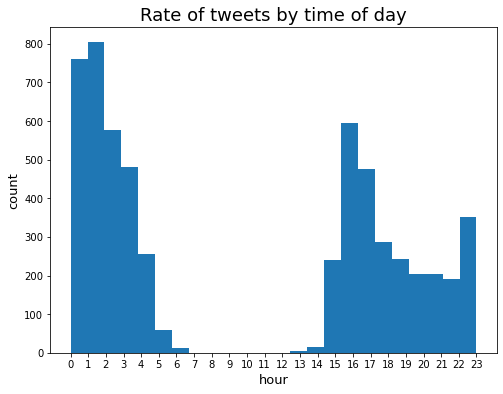

In [118]:
# create plot
plt.hist(df.hour, bins=24)
plt.title('Rate of tweets by time of day', fontsize=18)
plt.xlabel('hour', fontsize=13)
plt.ylabel('count', fontsize=13)
ticks = list(range(24))
plt.xticks(ticks);

##### Deduction: 
> From the chart, the user seemed to post most in the early hours of the day - between 12 AM and 3 AM. There  was also a lot of activity during the day - between 3 PM and 5 PM.

#### Insight 2: What dog breed was most shared? 

##### Process: 
> Group the data by the various dog breeds and find the total retweet count for each breed. Select the top 5 breeds

In [119]:
dog_retweet = df.groupby('dog_breed')['retweet_count'].sum().sort_values(ascending= False).head() #create group by dog breeds
dog_retweet

dog_breed
golden_retriever      1575908
Labrador_retriever    1098952
Pembroke               909860
Chihuahua              728828
Samoyed                566432
Name: retweet_count, dtype: int64

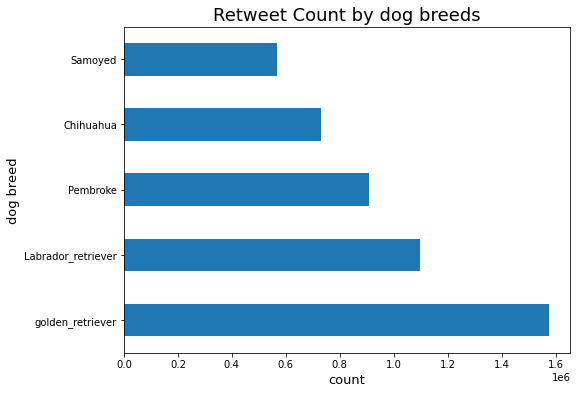

In [120]:
dog_retweet.plot(kind='barh') 
plt.title('Retweet Count by dog breeds', fontsize=18)
plt.xlabel('count', fontsize=13)
plt.ylabel('dog breed', fontsize=13);

##### Deduction: 
> from the result in the chart, the golden retriever saw the most retweets (or shares) among other breeds

#### Insight 3: What dog breed was most liked?

In [121]:
fave_dog = df.groupby('dog_breed')['favorite_count'].sum().sort_values(ascending= False).head() #create group by dog breeds
fave_dog

dog_breed
golden_retriever      5731296
Labrador_retriever    3575276
Pembroke              3470096
Chihuahua             2383560
Samoyed               1791788
Name: favorite_count, dtype: int64

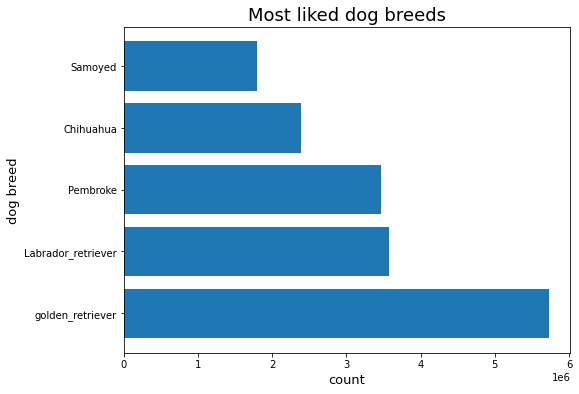

In [125]:
plt.barh(fave_dog.index, fave_dog.values)
plt.title('Most liked dog breeds', fontsize=18)
plt.xlabel('count', fontsize=13)
plt.ylabel('dog breed', fontsize=13);

###### Process: 
> Group the data by the various dog breeds and find the total favorite count for each breed. Select the top 5 breeds

##### Deduction:
> The golden retriever was again the breed with the most likes among others.

#### Insight 4: What were themost popular ratings for dog breeds?

###### Process: 
> Group the data by the various ratings from the user and find the count under each rating. Select the top 5 breeds

In [123]:
rating_count = df.groupby('rating_numerator')['favorite_count'].count().sort_values(ascending = False).head() #create group by ratings
rating_count

rating_numerator
12.0    1504
10.0    1264
11.0    1220
13.0     816
9.0      424
Name: favorite_count, dtype: int64

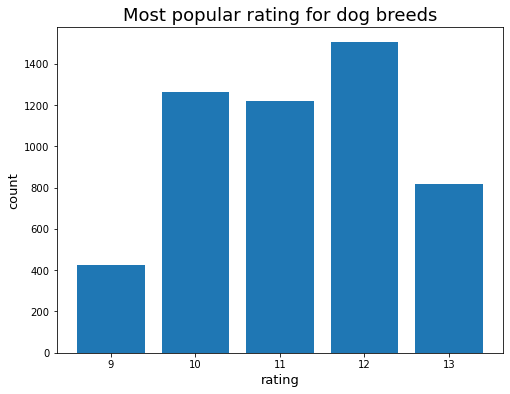

In [124]:
# creat plot
plt.bar(rating_count.index, rating_count.values)
plt.title('Most popular rating for dog breeds', fontsize=18)
plt.xlabel('rating', fontsize=13)
plt.ylabel('count', fontsize=13);

##### Deduction: 
> The ratings 12, 11, and 10 were the most common ratings that various dogs received.